# Simulation of the METIS scenario with rooms in one floor

This notebook simulates the scenario with one access point in each room of a given floor building.

## Some Initialization Code

First we do some initializations and import the required modules.

In [2]:
%matplotlib inline

# xxxxxxxxxx Add the parent folder to the python path. xxxxxxxxxxxxxxxxxxxx
import sys
import os
pyphysim_folder = "~/cvs_files/pyphysim/"
pyphysim_folder = os.path.expanduser(pyphysim_folder)
sys.path.append(pyphysim_folder)
# xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx

from matplotlib import pyplot as plt
import numpy as np

from IPython.html.widgets import interact, interactive, fixed
from IPython.html import widgets
from IPython.display import display_latex

# Import the simulation runner
from apps.metis_scenarios.simulate_metis_scenario import *

## Simulation Configuration

Now we set the simulation configuration.

In [3]:
scenario_params = {
    'side_length': 10,  # 10 meters side length
    'single_wall_loss_dB': 5,
    'num_rooms_per_side': 12,
    'ap_decimation': 1}

power_params = {
    'Pt_dBm': 20,  # 20 dBm transmit power
    'noise_power_dBm': -300  # Very low noise power
}

## Perform the Simulation

calculate the SINRs

In [4]:
out = perform_simulation_SINR_heatmap(scenario_params, power_params)

(sinr_array_pl_nothing_dB,
 sinr_array_pl_3gpp_dB,
 sinr_array_pl_free_space_dB,
 sinr_array_pl_metis_ps7_dB) = out

/home/uguen/Documents/rch/devel/pyphysim/pyphysim/channels/pathloss.py:790: RuntimeWarning: divide by zero encountered in log10
  PL = (10 * self._n * log10(d)) + self._C
/home/uguen/Documents/rch/devel/pyphysim/pyphysim/channels/pathloss.py:1220: RuntimeWarning: divide by zero encountered in log10
  pl_dB = A * log10(d) + B + C * log10(fc_GHz / 5.)


In [5]:
num_discrete_positions_per_room = 15

sinr_array_pl_nothing_dB2 = prepare_sinr_array_for_color_plot(
    sinr_array_pl_nothing_dB,
    scenario_params['num_rooms_per_side'],
    num_discrete_positions_per_room)
sinr_array_pl_3gpp_dB2 = prepare_sinr_array_for_color_plot(
    sinr_array_pl_3gpp_dB,
    scenario_params['num_rooms_per_side'],
    num_discrete_positions_per_room)
sinr_array_pl_free_space_dB2 = prepare_sinr_array_for_color_plot(
    sinr_array_pl_free_space_dB,
    scenario_params['num_rooms_per_side'],
    num_discrete_positions_per_room)
sinr_array_pl_metis_ps7_dB2 = prepare_sinr_array_for_color_plot(
    sinr_array_pl_metis_ps7_dB,
    scenario_params['num_rooms_per_side'],
    num_discrete_positions_per_room)

## Print Min/Mean/Max SIR values (no noise)

In [6]:
print ("Min/Mean/Max SINR value (no PL):"
       "\n    {0}\n    {1}\n    {2}").format(
           sinr_array_pl_nothing_dB.min(),
           sinr_array_pl_nothing_dB.mean(),
           sinr_array_pl_nothing_dB.max())
print ("Min/Mean/Max SINR value (3GPP):"
       "\n    {0}\n    {1}\n    {2}").format(
           sinr_array_pl_3gpp_dB.min(),
           sinr_array_pl_3gpp_dB.mean(),
           sinr_array_pl_3gpp_dB.max())
print ("Min/Mean/Max SINR value (Free Space):"
       "\n    {0}\n    {1}\n    {2}").format(
           sinr_array_pl_free_space_dB.min(),
           sinr_array_pl_free_space_dB.mean(),
           sinr_array_pl_free_space_dB.max())
print ("Min/Mean/Max SINR value (METIS PS7):"
       "\n    {0}\n    {1}\n    {2}").format(
           sinr_array_pl_metis_ps7_dB.min(),
           sinr_array_pl_metis_ps7_dB.mean(),
           sinr_array_pl_metis_ps7_dB.max())

Min/Mean/Max SINR value (no PL):
    -4.31046390351
    -3.50072649647
    -0.564587895305
Min/Mean/Max SINR value (3GPP):
    2.26972215624
    14.2035196427
    54.5802518151
Min/Mean/Max SINR value (Free Space):
    0.579790615969
    7.12399255068
    52.7291401471
Min/Mean/Max SINR value (METIS PS7):
    14.5052897928
    21.0497548594
    67.5985409489


# Create the Plots for the different cases

First we will create the plots for a noise variance equal to zero.

## Plot case without path loss (only wall loss)

Max SINR: -0.564587895305
Min SINR: -4.31046390351
Mean SINR: -3.50072649647


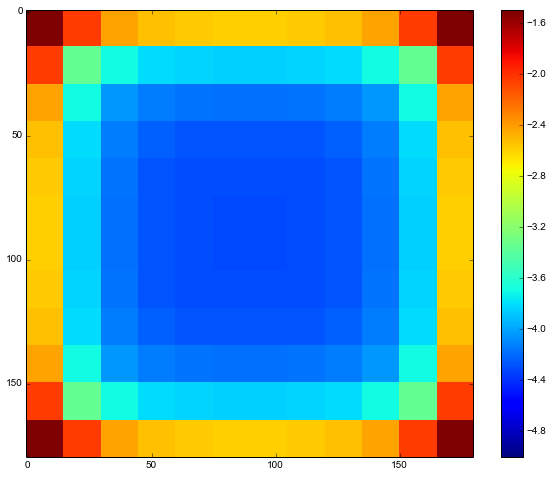

In [6]:
fig1, ax1 = plt.subplots(figsize=(10, 8))
print "Max SINR: {0}".format(sinr_array_pl_nothing_dB.max())
print "Min SINR: {0}".format(sinr_array_pl_nothing_dB.min())
print "Mean SINR: {0}".format(sinr_array_pl_nothing_dB.mean())
im1 = ax1.imshow(sinr_array_pl_nothing_dB2, interpolation='nearest', vmax=-1.5, vmin=-5)
fig1.colorbar(im1)
plt.show()

## Plot case with 3GPP path loss

Max SINR: 54.5802518151
Min SINR: 2.26972215624
Mean SINR: 14.2035196427


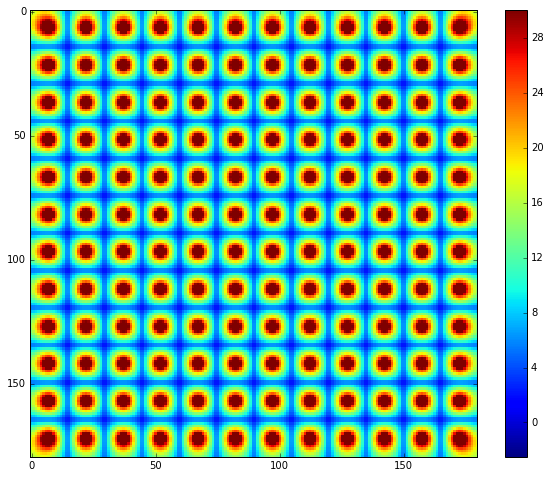

In [7]:
fig2, ax2 = plt.subplots(figsize=(10, 8))
print "Max SINR: {0}".format(sinr_array_pl_3gpp_dB.max())
print "Min SINR: {0}".format(sinr_array_pl_3gpp_dB.min())
print "Mean SINR: {0}".format(sinr_array_pl_3gpp_dB.mean())
im2 = ax2.imshow(sinr_array_pl_3gpp_dB2, interpolation='nearest', vmax=30, vmin=-2.5)
fig2.colorbar(im2)
plt.show()

## Case with Free Space Path Loss

Max SINR: 52.7291401471
Min SINR: 0.579790615969
Mean SINR: 7.12399255068


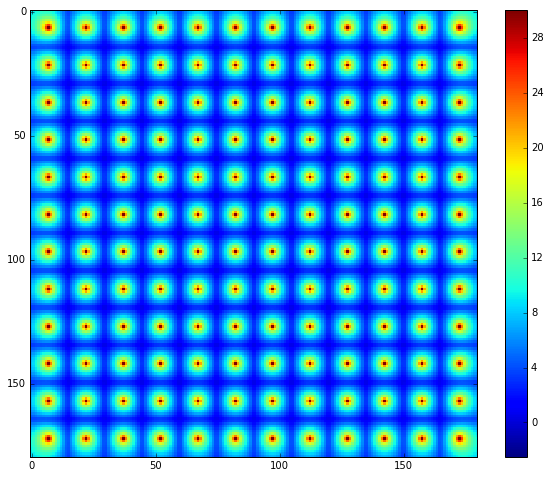

In [8]:
fig3, ax3 = plt.subplots(figsize=(10, 8))
print "Max SINR: {0}".format(sinr_array_pl_free_space_dB.max())
print "Min SINR: {0}".format(sinr_array_pl_free_space_dB.min())
print "Mean SINR: {0}".format(sinr_array_pl_free_space_dB.mean())
im3 = ax3.imshow(sinr_array_pl_free_space_dB2, interpolation='nearest', vmax=30, vmin=-2.5)
fig3.colorbar(im3)
plt.show()

## Plot case with METIS PS7 path loss

Max SINR: 67.5985409489
Min SINR: 14.5052897928
Mean SINR: 21.0497548594


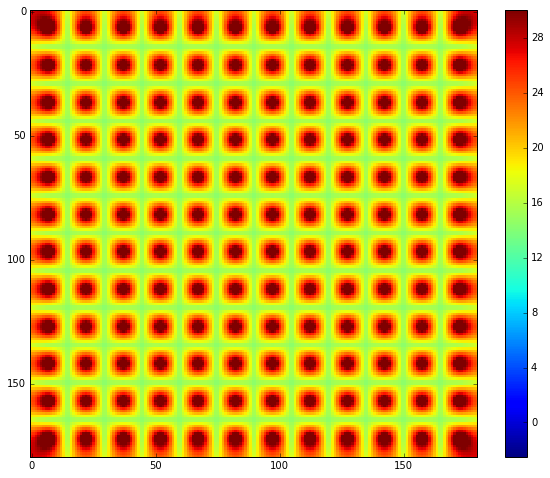

In [9]:
fig4, ax4 = plt.subplots(figsize=(10, 8))
print "Max SINR: {0}".format(sinr_array_pl_metis_ps7_dB.max())
print "Min SINR: {0}".format(sinr_array_pl_metis_ps7_dB.min())
print "Mean SINR: {0}".format(sinr_array_pl_metis_ps7_dB.mean())
im4 = ax4.imshow(sinr_array_pl_metis_ps7_dB2, interpolation='nearest', vmax=30, vmin=-2.5)
fig4.colorbar(im4)
plt.show()

## Create the plots with interact

Here we repeat the plots, but now using IPython interact. This allow us to change unput parameters and see the result in the plot.

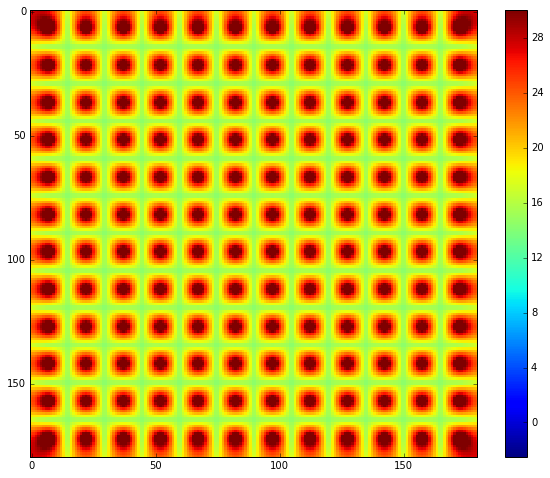

Min/Mean/Max SINR value (METIS PS7):
    7.15412722676
    26.4595064471
    105.252121195


In [10]:
@interact(Pt_dBm=(0., 40., 5.), noise_power_dBm=(-160., 0.0, 5.), pl_model=['nothing', '3gpp', 'free_space', 'metis'], ap_decimation=['1', '2', '4', '9'])
def plot_SINRs(Pt_dBm=30., noise_power_dBm=-160, pl_model='3gpp', ap_decimation=1):
    scenario_params = {
    'side_length': 10,  # 10 meters side length
    'single_wall_loss_dB': 5,
    'num_rooms_per_side': 12,
    'ap_decimation': int(ap_decimation)}
    
    power_params = {
        'Pt_dBm': Pt_dBm,  # 20 dBm transmit power
        'noise_power_dBm': noise_power_dBm  # Very low noise power
    }
    
    out = perform_simulation_SINR_heatmap(scenario_params, power_params)

    (sinr_array_pl_nothing_dB,
     sinr_array_pl_3gpp_dB,
     sinr_array_pl_free_space_dB,
     sinr_array_pl_metis_ps7_dB) = out
    
    
    #sinr_array_pl_nothing_dB, sinr_array_pl_3gpp_dB, sinr_array_pl_free_space_dB, sinr_array_pl_metis_ps7_dB = calc_SINRs(Pt_dBm, noise_var)

    fig, ax = plt.subplots(figsize=(10, 8))
    
    if pl_model == 'nothing':    
        im = ax.imshow(sinr_array_pl_nothing_dB2, interpolation='nearest', vmax=-1.5, vmin=-5.)
        fig.colorbar(im)
        plt.show()
        print ("Min/Mean/Max SINR value (no PL):"
               "\n    {0}\n    {1}\n    {2}").format(
                   sinr_array_pl_nothing_dB.min(),
                   sinr_array_pl_nothing_dB.mean(),
                   sinr_array_pl_nothing_dB.max())
    elif pl_model == '3gpp':
        im = ax.imshow(sinr_array_pl_3gpp_dB2, interpolation='nearest', vmax=30, vmin=-2.5)
        fig.colorbar(im)
        ax.set_title('ka')
        plt.show()
        print ("Min/Mean/Max SINR value (3GPP):"
           "\n    {0}\n    {1}\n    {2}").format(
               sinr_array_pl_3gpp_dB.min(),
               sinr_array_pl_3gpp_dB.mean(),
               sinr_array_pl_3gpp_dB.max())
    elif pl_model == 'free_space':
        im = ax.imshow(sinr_array_pl_free_space_dB2, interpolation='nearest', vmax=30, vmin=-2.5)
        fig.colorbar(im)
        plt.show()
        print ("Min/Mean/Max SINR value (Free Space):"
           "\n    {0}\n    {1}\n    {2}").format(
               sinr_array_pl_free_space_dB.min(),
               sinr_array_pl_free_space_dB.mean(),
               sinr_array_pl_free_space_dB.max())
    elif pl_model == 'metis':
        im = ax.imshow(sinr_array_pl_metis_ps7_dB2, interpolation='nearest', vmax=30, vmin=-2.5)
        fig.colorbar(im)
        plt.show()
        print ("Min/Mean/Max SINR value (METIS PS7):"
           "\n    {0}\n    {1}\n    {2}").format(
               sinr_array_pl_metis_ps7_dB.min(),
               sinr_array_pl_metis_ps7_dB.mean(),
               sinr_array_pl_metis_ps7_dB.max())
    else:
         raise ValueError('Invalid path loss model: {0}'.format(pl_model))